In [1]:
import Quandl
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

api_key = 'z9npsVbnrGHuZZWxdszZ'

In [2]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')

In [3]:
list_abbr = fiddy_states[0][0][1:].tolist()

In [4]:
# print(type(list_abbr))
dict_dfs = {}
for el in list_abbr:
    temp_id = 'FMAC/HPI_' + el
    temp_df = Quandl.get(temp_id, authtoken=api_key)
    dict_dfs[temp_id] = temp_df
#    print('FMAC/HPI_' + el)
# print(dict_dfs)

with open('workspace.pickle', 'wb') as fid:
    pickle.dump(dict_dfs, fid)

In [5]:
with open('workspace.pickle', 'rb') as fid:
    dict_dfs = pickle.load(fid)

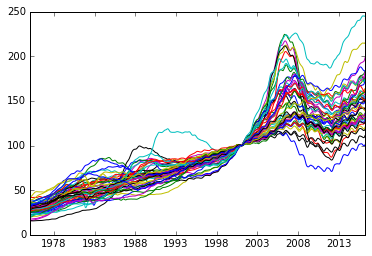

In [6]:
for el in list_abbr:
    plt.plot(dict_dfs['FMAC/HPI_' + el])

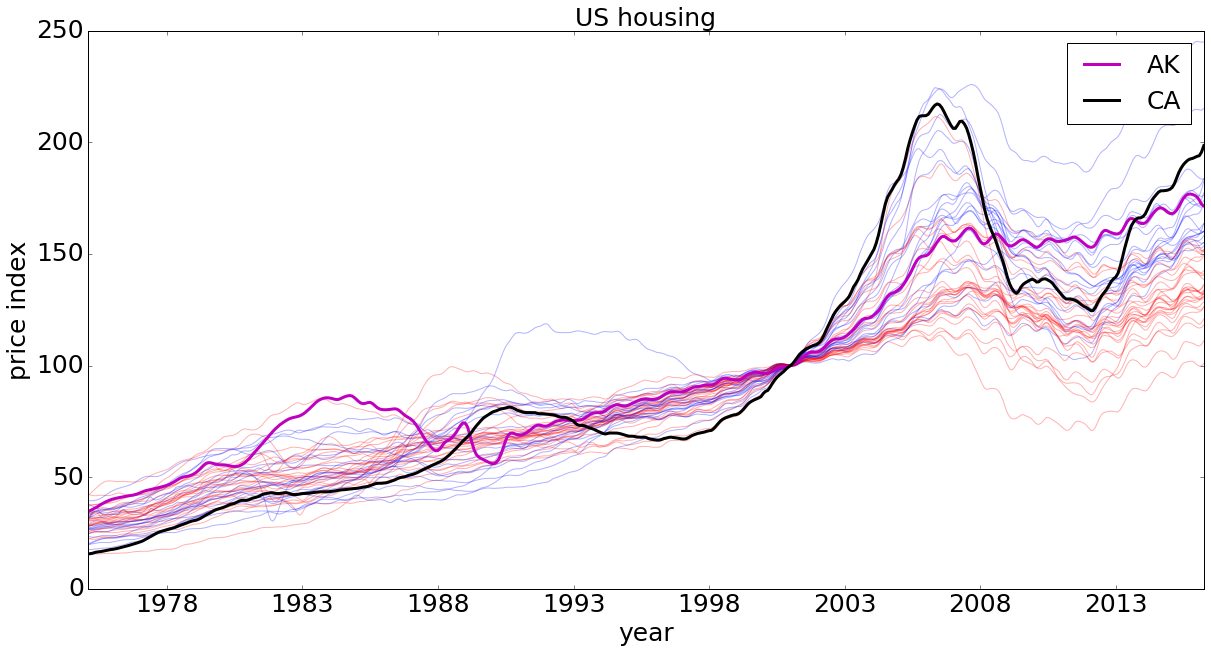

In [7]:
temp_list = list(map(lambda el: dict_dfs['FMAC/HPI_' + el]['Value'][-1], list_abbr))
# print(temp_list)

plt.figure(figsize=(20,10))
for el in list_abbr:
    df = dict_dfs['FMAC/HPI_' + el]
    if df['Value'][-1] < np.mean(temp_list):
        plt.plot(df, color='r', alpha=0.3)
    else:
        plt.plot(df, color='b', alpha=0.3)
        
plt.plot(dict_dfs['FMAC/HPI_AK'], color='m', linewidth=3.0, label='AK')
plt.plot(dict_dfs['FMAC/HPI_CA'], color='k', linewidth=3.0, label='CA')

plt.xlabel('year')
plt.ylabel('price index')
plt.title('US housing')
plt.legend(fontsize = 25)

ax = plt.gca()
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(25)

                Value
Date                 
1975-01-31  34.428823
1975-02-28  34.939511
1975-03-31  35.462251
1975-04-30  36.007684
1975-05-31  36.603319
                Value
Date                 
1975-01-31  15.658282
1975-02-28  15.709495
1975-03-31  15.894529
1975-04-30  16.204209
1975-05-31  16.466741
                Value   CA_Value
Date                            
1975-01-31  34.428823  15.658282
1975-02-28  34.939511  15.709495
1975-03-31  35.462251  15.894529
1975-04-30  36.007684  16.204209
1975-05-31  36.603319  16.466741


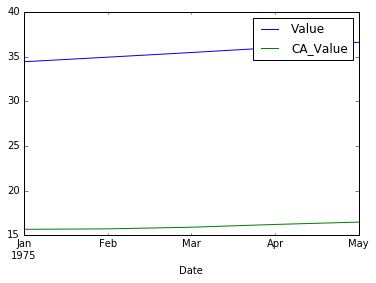

In [8]:
print(dict_dfs['FMAC/HPI_AK'].head())
print(dict_dfs['FMAC/HPI_CA'].head())
print('=========')
# temp = pd.concat([dict_dfs['FMAC/HPI_AK'].head(), dict_dfs['FMAC/HPI_CA'].rename(columns={'Value':'CA_Value'}).head()])
# print(temp)

temp = pd.merge(dict_dfs['FMAC/HPI_AK'].head(), dict_dfs['FMAC/HPI_CA'].rename(columns={'Value':'CA_Value'}).head(), 
                left_index=True, right_index=True)
print(temp)
dict_dfs['FMAC/HPI_CA']
# dict_dfs['FMAC/HPI_CA'].reset_index()

temp.plot()
plt.legend()

---------------------------------------
### Ok, let's follow the guy more closely now...

In [9]:
# print(type(list_abbr))
main_df = pd.DataFrame()

for el in list_abbr:
    temp_id = 'FMAC/HPI_' + el
    temp_df = Quandl.get(temp_id, authtoken=api_key)
    
    if main_df.empty:
        main_df = temp_df
    else:
        main_df[el] = temp_df

main_df.rename(columns={'Value': 'AL'}, inplace=True) # monkey patching

with open('workspace.pickle', 'wb') as fid:
    pickle.dump(main_df, fid)

(0, 260)

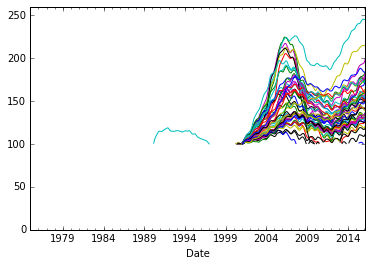

In [10]:
# print(main_df);
# main_df.describe()
# plt.plot(main_df);

main_df[main_df > 100].plot()
plt.legend().remove()

ax = plt.gca()
# ax.get_ylim()
ax.set_ylim([0,260])

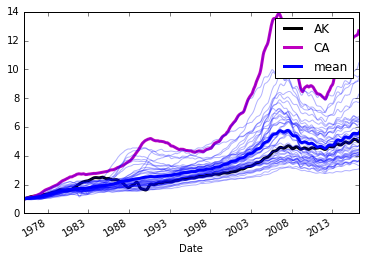

In [11]:
main_df_percent_change = main_df.copy()

# print(main_df_percent_change)

# print(main_df_percent_change)

for column in main_df_percent_change:
    main_df_percent_change[column] = main_df_percent_change[column] / main_df_percent_change[column][0]


h1, = plt.plot(main_df_percent_change['AK'], color='k', linewidth=3.0, label='AK')
h2, = plt.plot(main_df_percent_change['CA'], color='m', linewidth=3.0, label='CA')
h3, = plt.plot(main_df_percent_change.mean(axis=1), color='b', linewidth=3.0, label='mean')

main_df_percent_change.plot(ax=plt.gca(), alpha=0.3, color='b', label=None)
plt.legend([h1, h2, h3], [h1.get_label(), h2.get_label(), h3.get_label()])


In [12]:
last_each_col = main_df.iloc[-1:]
# print(last_each_col.T)
last_each_col.T.sort_values(by='20160331', ascending=False).head(5)
# print(last_each_col.idxmax())
# print(last_each_col.max())

Date,2016-03-31 00:00:00
HI,245.040802
ND,215.220959
CA,198.539913
OR,183.904048
WY,183.543735


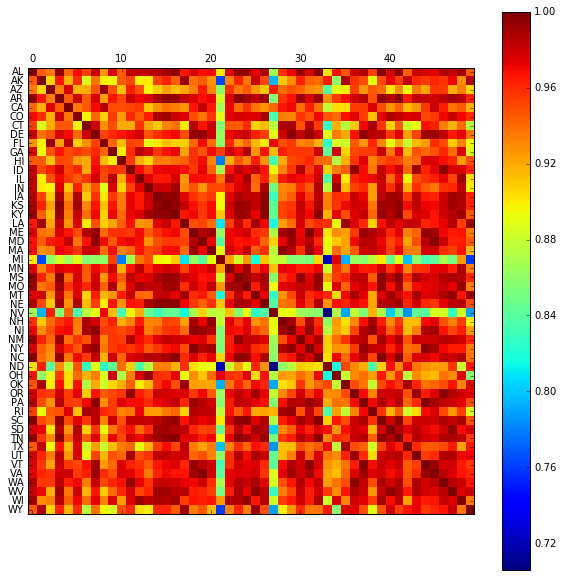

In [13]:
corr = main_df.corr()

fig, ax = plt.subplots(figsize=(10, 10))
h = ax.matshow(corr)
# plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

plt.colorbar(h)
plt.set_cmap('Greys')

In [14]:
# plt.plot(main_df.resample('A').ohlc())
# plt.plot(main_df['AK'])
main_df.resample('A').ohlc()

AL                                              AK  \
                  open        high         low       close        open   
Date                                                                     
1975-12-31   35.397736   36.635125   35.397736   36.407446   34.428823   
1976-12-31   36.932755   39.148670   36.932755   39.148670   40.443165   
1977-12-31   39.238354   42.721608   39.238354   42.721608   43.346176   
1978-12-31   42.771599   47.277798   42.771599   47.277798   46.722435   
1979-12-31   47.480957   50.802834   47.480957   50.802834   52.186493   
1980-12-31   50.818878   52.862357   50.818878   51.920811   55.490792   
1981-12-31   51.296071   53.428241   50.653224   52.345059   58.985140   
1982-12-31   52.088100   53.907439   52.088100   53.907439   72.580826   
1983-12-31   54.055606   57.380991   54.055606   57.380991   78.793905   
1984-12-31   57.784332   59.386910   57.001191   57.001191   85.291612   
1985-12-31   57.335085   61.487030   57.335085   61.487030   83.779719   
1986-12-31   61.571281   64.722689   61.571281   64.722689   80.212378   
1987-12-31   64.948456   66.093998   64.948456   65.966917   75.113953   
1988-12-31   66.256478   67.831967   66.256478   66.856213   62.824915   
1989-12-31   67.117307   69.791333   67.117307   69.791333   72.643159   
1990-12-31   69.726880   70.673736   69.706630   70.519770   56.100688   
1991-12-31   70.447687   72.604876   70.447687   72.604876   68.879080   
1992-12-31   72.720750   75.368230   72.720750   75.311302   73.206782   
1993-12-31   75.248843   78.640081   75.248843   78.640081   75.368219   
1994-12-31   78.705416   82.467621   78.705416   82.467621   79.163893   
1995-12-31   82.622641   84.678910   82.622641   84.678910   82.604365   
1996-12-31   84.885709   88.133377   84.885709   87.987222   85.189388   
1997-12-31   88.097202   90.746711   88.097202   90.746711   88.473912   
1998-12-31   90.824332   93.900183   90.824332   93.900183   91.374469   
1999-12-31   93.987440   97.661197   93.987440   97.661197   93.493743   
2000-12-31   97.713316  100.090100   97.713316  100.000000   96.431455   
2001-12-31   99.937843  102.170277   99.937843  102.170277  100.372140   
2002-12-31  102.287290  106.147065  102.287290  106.147065  106.562115   
2003-12-31  106.184472  109.586473  106.120127  109.586473  113.497408   
2004-12-31  109.880116  115.765162  109.880116  115.765162  122.660286   
2005-12-31  115.786135  125.951270  115.786135  125.951270  135.086991   
2006-12-31  126.578158  133.257499  126.578158  133.158367  149.817533   
2007-12-31  132.900432  136.850285  132.900432  133.390292  155.936097   
2008-12-31  132.718141  134.205781  127.658237  127.658237  154.693849   
2009-12-31  126.886819  127.121496  125.068576  125.068576  153.552145   
2010-12-31  123.961990  123.961990  116.458332  116.458332  153.007257   
2011-12-31  115.687271  115.978410  112.353587  112.360956  155.964901   
2012-12-31  112.581694  117.000449  112.581694  115.324097  152.967957   
2013-12-31  115.499829  121.132159  115.499829  119.288841  159.023445   
2014-12-31  119.828073  124.798769  119.828073  122.845531  163.891527   
2015-12-31  123.075282  127.847925  123.075282  126.015782  168.091284   
2016-12-31  126.458322  128.588020  126.458322  128.588020  174.093897   

                                                        AZ              \
                  high         low       close        open        high   
Date                                                                     
1975-12-31   40.173504   34.428823   40.173504   28.979368   30.416857   
1976-12-31   42.924722   40.443165   42.924722   29.749153   30.834042   
1977-12-31   46.342927   43.346176   46.342927   30.931977   34.458014   
1978-12-31   51.518137   46.722435   51.518137   34.811995   41.533696   
1979-12-31   56.521088   52.186493   55.519381   42.110899   49.542380   
1980-12-31   57.913584   54.765148   57.913584   49.675050   54.448219   
1981-12-31   71.637940 

---------------------------------------
### Ok, let's do it my way

In [15]:
# print(type(list_abbr))
panel = pd.Panel()

for el in list_abbr:
    temp_id = 'FMAC/HPI_' + el
    temp_df = Quandl.get(temp_id, authtoken=api_key)
    
    if panel.empty:
        panel = pd.Panel({el: temp_df})
    else:
        panel[el] = temp_df

with open('workspace.pickle', 'wb') as fid:
    pickle.dump(panel, fid)

(0, 260)

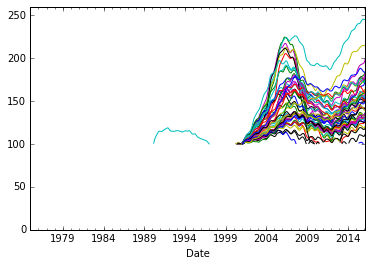

In [16]:
# print(panel.to_frame());
# panel.to_frame()
with open('workspace.pickle', 'rb') as fid:
    panel = pickle.load(fid)
    
for el in panel.items:
    panel[el] = panel[el][panel[el] > 100]
# for el in panel.items:
#     plt.plot(panel[el][panel[el] > 100])

temp_df = panel.to_frame(filter_observations=False).unstack(level=1)
fig, ax = plt.subplots()
temp_df.plot(ax=ax, legend=False)

# plt.legend()

ax = plt.gca()
# # ax.get_ylim()
ax.set_ylim([0,260])



In [17]:
# investigate unstack
panel.to_frame(filter_observations=False).unstack(level=1).columns.levels[1]


Index([u'Value'], dtype='object', name=u'minor')

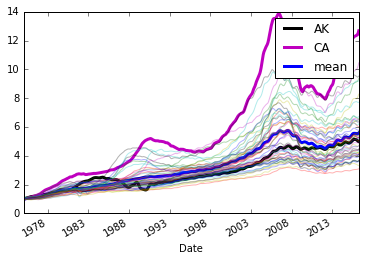

In [18]:
with open('workspace.pickle', 'rb') as fid:
    panel = pickle.load(fid)
    
panel_percent_change = panel.copy()

for el in panel_percent_change.items: 
    for column in panel_percent_change[el]:
        panel_percent_change[el][column] = panel_percent_change[el][column] / panel_percent_change[el][column][0]


fig, ax = plt.subplots()
h1, = plt.plot(panel_percent_change['AK'], color='k', linewidth=3.0, label='AK')
h2, = plt.plot(panel_percent_change['CA'], color='m', linewidth=3.0, label='CA')

h3, = plt.plot(panel_percent_change.mean(axis=0), color='b', linewidth=3.0, label='mean')

temp_df = panel_percent_change.to_frame(filter_observations=False).unstack(level=1)
temp_df.plot(ax=ax, legend=False, alpha=0.3)



plt.legend([h1, h2, h3], [h1.get_label(), h2.get_label(), h3.get_label()])




In [19]:
with open('workspace.pickle', 'rb') as fid:
    panel = pickle.load(fid)

# display(panel.to_frame())

last_each_pan = panel[:,-1,:]

last_each_pan.T.sort_values(by='Value', ascending=False).head(5)


,Value
HI,245.040802
ND,215.220959
CA,198.539913
OR,183.904048
WY,183.543735


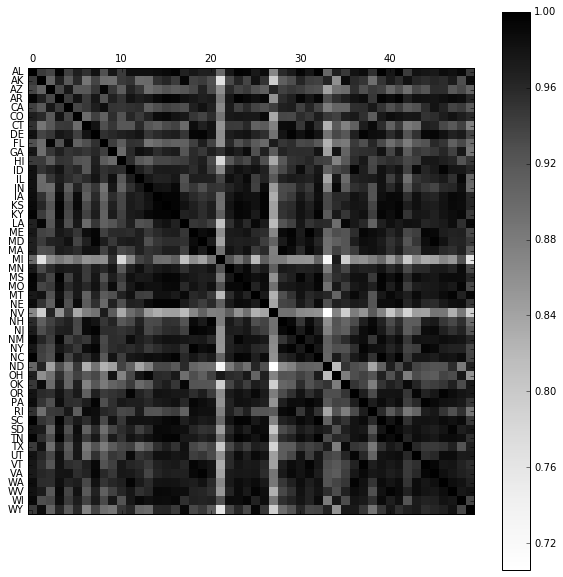

In [20]:
corr = panel.to_frame(filter_observations=False).corr()

fig, ax = plt.subplots(figsize=(10, 10))
h = ax.matshow(corr)
plt.yticks(range(len(corr.columns)), corr.columns);

plt.colorbar(h)
plt.set_cmap('Greys')

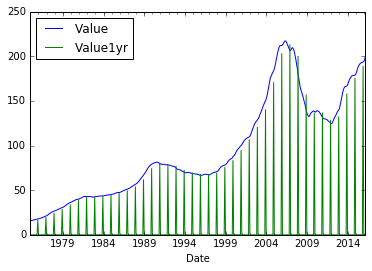

In [21]:
panel['CA']['Value1yr'] = panel['CA'].resample('A').mean()
# panel['CA'][['Value','Value1yr']].dropna().plot()
# panel['CA'][['Value','Value1yr']].dropna(how='all').plot()
# panel['CA'][['Value','Value1yr']].fillna(method='bfill').plot() # method='ffill'
panel['CA'][['Value','Value1yr']].fillna(value=0).plot()


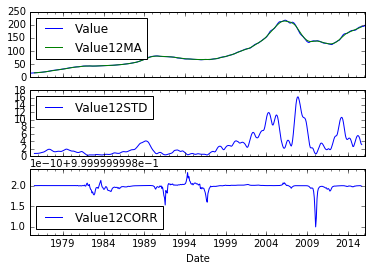

In [22]:
panel['CA']['Value12MA'] = panel['CA']['Value'].rolling(window=12, center=True).mean()
panel['CA']['Value12STD'] = panel['CA']['Value'].rolling(window=12, center=True).std()
panel['CA']['Value12CORR'] = panel['CA']['Value'].rolling(window=12, center=True).corr()

plt.figure()
ax1=plt.subplot2grid((3,1),(0,0))
ax2=plt.subplot2grid((3,1),(1,0), sharex=ax1)
ax3=plt.subplot2grid((3,1),(2,0), sharex=ax2)

panel['CA'][['Value','Value12MA',]].plot(ax=ax1)
panel['CA'][['Value12STD']].plot(ax=ax2)
panel['CA'][['Value12CORR']].plot(ax=ax3)


In [23]:
df_original = Quandl.get('FMAC/MORTG', trim_start='1975-01-01', authtoken=api_key)

In [24]:
df = df_original
df = df.resample('M').sum()
# df['Value_pct'].plot()

df['Value'] = df['Value'] / df['Value'][0]
panel_percent_change['MORTG'] = df

# panel_percent_change['MORTG'].plot()
# panel_percent_change['AK'].plot()

corr = panel_percent_change.to_frame(filter_observations=False).corr()



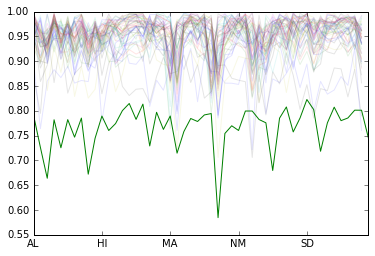

In [25]:
fig, ax = plt.subplots()

for el in corr:
    if el == 'MORTG':
        tmp = corr[el][corr[el] != 1.00]
        tmp = -tmp 
        tmp.plot(ax=ax)
    else:
        corr[el][corr[el] != 1.00][0:-1].plot(ax=ax, legend=False, alpha=0.1)



In [26]:
# want to average and put back into the corr df
for column in corr:
    print(corr[column][corr[column]!=1.00][:-1].mean())

0.968544808764
0.936268746413
0.929414453524
0.970189531869
0.943443813422
0.954789540865
0.932365168333
0.962968077019
0.925655312484
0.950302558605
0.93544185538
0.960735447604
0.955947785439
0.947253177595
0.960753614149
0.966794602355
0.96560877034
0.951484457259
0.960976973177
0.958553426016
0.956650327136
0.867080182876
0.962033180193
0.969234005617
0.969227989033
0.958093355529
0.960569356407
0.862563067951
0.94643889593
0.956008402107
0.964575878517
0.960315948854
0.966317344239
0.898996356916
0.929598246563
0.932499293171
0.96154821137
0.965134610815
0.941723838765
0.97065694026
0.958077049085
0.969201079977
0.934383090787
0.955612262165
0.961086278079
0.965030534434
0.967439893383
0.962499455933
0.963545683451
0.93563956263
-0.767175767772


In [ ]:
whos